# 로지스틱 회귀(Logistic Regression) 

둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)  
대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)  

## 이진 분류(Binary Classification)

합격을 1, 불합격을 0이라고 하였을 때 그래프  
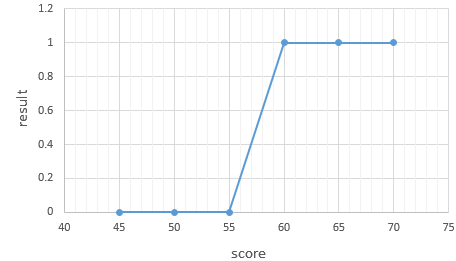
이러한 x와 y의 관계를 표현하기 위해서는 Wx+b와 같은 직선 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요 
H(x)=Wx+b 가 아니라, 위와 같이 S자 모양의 그래프를 만들 수 있는 어떤 특정 함수 f를 추가적으로 사용하여 H(x)=f(Wx+b)의 가설을 사용  

In [3]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x)) 

 

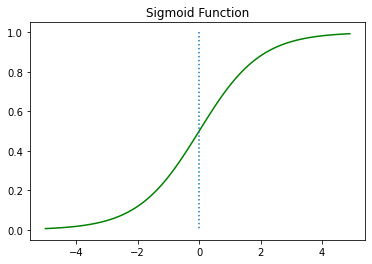

In [4]:
# 가장 먼저 W가 1이고, b가 0인 그래프를 그림 
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

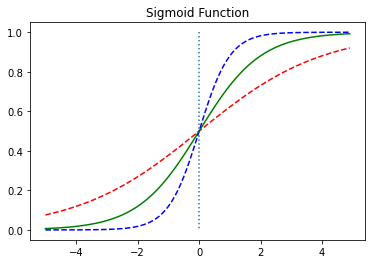

In [5]:
# W값의 변화에 따른 경사도의 변화 

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

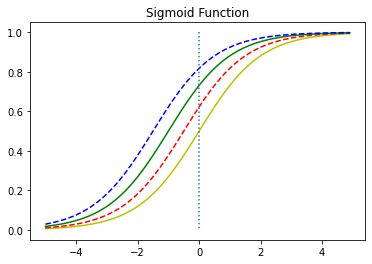

In [7]:
# b 값의 변화에 따른 좌,우 이동

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x+0) # 이동하지 않은 그대로
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)


plt.plot(x,y,'y')
plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

## 그래프를 통한 수식 분석
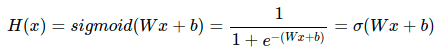

W 의 값이 커지면 경사가 커지고 W의 값이 작아지면 경사가 작아짐  
b 값이 증가하면 그래프가 왼쪽으로 이동
  
## 시그모이드 함수를 이용한 분류 

시그모이드 함수는 입력값이 한없이 커지면 1에 수렴하고, 입력값이 한없이 작아지면 0에 수렴  
시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데 이 특성을 이용하여 분류 작업에 사용할 수 있음  

ex)
```
임계값을 0.5라고 가정. 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)으로 판단할 수 있음
이를 확률이라고 생각하면 해당 레이블에 속할 확률이 50%가 넘으면 해당 레이블로 판단하고, 해당 레이블에 속할 확률이 50%보다 낮으면 아니라고 판단하는것
```

# 비용 함수(Cost function) 
이제 로지스틱 회귀의 가설이 H(x)=sigmoid(Wx+b)인 것은 알았습니다.  
이제 최적의 W와 b를 찾을 수 있는 비용 함수(cost function)를 정의해야 합니다  

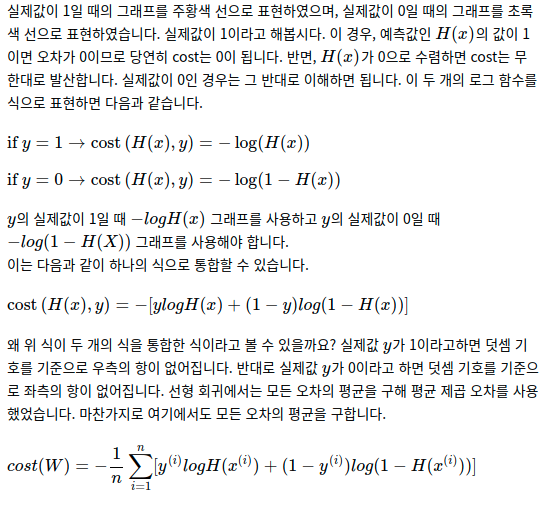

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
# for reproducibility 
torch.manual_seed(1) 




# 6x2 
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
# 6x1
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


#  x_train을 X라고 하고, 이와 곱해지는 가중치 벡터를 W라고 하였을 때, 
# XW가 성립되기 위해서는 W 벡터의 크기는 2 × 1 

# W와 b는 torch.zeros를 통해 전부 0으로 초기화 
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True) 

# e^x를 구현하기 위해서 torch.exp(x)를 사용
# matmul 로 x_train 과 W 를 행렬 연산 
# torch.matmul(x_train,w) 와 동일 
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b))) 

# 이미 파이토치에서는 시그모이드 함수를 이미 구현하여 제공 
# 다음은 torch.sigmoid를 사용하여 좀 더 간단히 구현한 가설식
hypothesis = torch.sigmoid(x_train.matmul(W) + b) 

# 찬가지로 W와 b가 0으로 초기화 된 상태에서 예측값을 출력 
# 예측값 
print(hypothesis)
# 실제값 
print(y_train)

# 오차 구하는 식 
losses = -(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))
print(losses) 

# 오차에 대한 평균을 구함

cost = losses.mean()
print(cost) 

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
tensor([0.6931], grad_fn=<NegBackward>)


## 인공 신경망으로 표현되는 로지스틱 회귀 
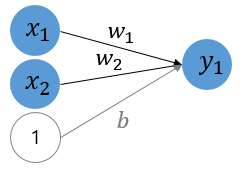
위의 인공 신경망 그림에서 각 화살표는 입력과 곱해지는 가중치 또는 편향입니다. 각 입력에 대해서 검은색 화살표는 가중치, 회색 화살표는 편향이 곱해집니다. 각 입력 x는 각 입력의 가중치 w와 곱해지고, 편향 b는 상수 1과 곱해지는 것으로 표현되었습니다. 그리고 출력하기 전에 시그모이드 함수를 지나게 됩니다.  
결과적으로 위의 인공 신경망은 다음과 같은 다중 로지스틱 회귀를 표현하고 있습니다.  
